In [16]:
# Load packages required for this example
library(scoper)
library(dplyr)
library(ggplot2)
library(alakazam)
library(shazam)

# loading my tsv as a df
# this tsv contains only H
require(data.table)
vac_H_data <- as.data.frame(fread("/home/phil/processed_docker/vac_docker/changeo_10x/vac_heavy_germ-pass.tsv"))

# In order to infer clonal relationship, the simplest method is
# defining clones among identical junction region sequences.
# this is the junciton where the V, D, and J gene segments join.

In [17]:
read.table("/home/phil/processed_docker/vac_docker/changeo_10x/vac_heavy_germ-pass.tsv", sep = '\t', header = TRUE)

sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,⋯,umi_count,v_call_10x,d_call_10x,j_call_10x,junction_10x,junction_10x_aa,germline_alignment_d_mask,germline_v_call,germline_d_call,germline_j_call
<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ACGATACTCAACGCTA-1_contig_2,ACTGTTCTCTTTACAGTTACTGAGCACACAGGACCTCACCATGGGATGGAGCTGTATCATGCTCTTCTTGGCAGCAACAGCTACAGGTGTCCACTCCCAGGTCCAACTGCAGCAGCCTGGGGCTGAGCTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCAAGGCTTCTGGCTACACCTTCACCAGCTACTGGATGCACTGGGTGAAGCAGAGGCCTGGACGAGGCCTTGAGTGGATTGGAAGGATTGATCCTAATAGTGGTGGTACTAAGTACAATGAGAAGTTCAAGAGCAAGGCCACACTGACTGTAGACAAACCCTCCAGCACAGCCTACATGCAGCTCAGCAGCCTGACATCTGAGGACTCTGCGGTCTATTATTGTGCAAGATTAGGGGGCTACGGTAATGCTATGGACTACTGGGGTCAAGGAACCTCAGTCACCGTCTCCTCAGAGAGTCAGTCCTTCCCAAATGTCTTCCCCCTCGTCTCCTGCGAGAGCCCCCTGTCTGATAAGAATCTGGTGGCCATGGGCTGCCTGGCCCGGGACTTCCTGCCCAGCACCATTTCCTTCACCTGGAACTACCAGAACAACACTGAAGTCATCCAGGGTATCAGAACCTTCCCAACACTGAGGACAGGGGGCAAGTACCTAGCCACCTCGCA,FALSE,TRUE,IGHV1-72*01,IGHD1-1*01,IGHJ4*01,CAGGTCCAACTGCAGCAGCCTGGGGCT...GAGCTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCAAGGCTTCTGGCTACACCTTC............ACCAGCTACTGGATGCACTGGGTGAAGCAGAGGCCTGGACGAGGCCTTGAGTGGATTGGAAGGATTGATCCTAAT......AGTGGTGGTACTAAGTACAATGAGAAGTTCAAG...AGCAAGGCCACACTGACTGTAGACAAACCCTCCAGCACAGCCTACATGCAGCTCAGCAGCCTGACATCTGAGGACTCTGCGGTCTATTATTGTGCAAGATTAGGGGGCTACGGTAATGCTATGGACTACTGGGGTCAAGGAACCTCAGTCACCGTCTCCTCAG,CAGGTCCAACTGCAGCAGCCTGGGGCT...GAGCTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCAAGGCTTCTGGCTACACCTTC............ACCAGCTACTGGATGCACTGGGTGAAGCAGAGGCCTGGACGAGGCCTTGAGTGGATTGGAAGGATTGATCCTAAT......AGTGGTGGTACTAAGTACAATGAGAAGTTCAAG...AGCAAGGCCACACTGACTGTAGACAAACCCTCCAGCACAGCCTACATGCAGCTCAGCAGCCTGACATCTGAGGACTCTGCGGTCTATTATTGTGCAAGANNNNNNNNCTACGGTAATGCTATGGACTACTGGGGTCAAGGAACCTCAGTCACCGTCTCCTCAG,TGTGCAAGATTAGGGGGCTACGGTAATGCTATGGACTACTGG,⋯,6,IGHV1-72,,IGHJ4,TGTGCAAGATTAGGGGGCTACGGTAATGCTATGGACTACTGG,CARLGGYGNAMDYW,CAGGTCCAACTGCAGCAGCCTGGGGCT...GAGCTTGTGAAGCCTGGGGCTTCAGTGAAGCTGTCCTGCAAGGCTTCTGGCTACACCTTC............ACCAGCTACTGGATGCACTGGGTGAAGCAGAGGCCTGGACGAGGCCTTGAGTGGATTGGAAGGATTGATCCTAAT......AGTGGTGGTACTAAGTACAATGAGAAGTTCAAG...AGCAAGGCCACACTGACTGTAGACAAACCCTCCAGCACAGCCTACATGCAGCTCAGCAGCCTGACATCTGAGGACTCTGCGGTCTATTATTGTGCAAGANNNNNNNNNNNNNNNNATGCTATGGACTACTGGGGTCAAGGAACCTCAGTCACCGTCTCCTCAG,IGHV1-72*01,IGHD1-1*01,IGHJ4*01
TGGCCAGTCTCTTATG-1_contig_1,GAACAACCCATGATCAGTATCCTCTCCACAGTCACTGAAGACACTGACTCAAACCATGGAATGGTGCTGGGTCTTTCTCTTCCTCCTGTCAGTAACTGCAGGTGTCCACTCCCAGGTCCAGCTGCAGCAGTCTGGAGCTGAGCTGGTGAAACCCGGGGCATCAGTGAAGCTGTCCTGCAAGGCTTCTGGCTACACCTTCACTGAGTATACTATACACTGGGTAAAGCAGAGGTCTGGACAGGGTCTTGAGTGGATTGGGTGGTTTTACCCTGGAAGTGGTAGTATAAAGTACAATGAGAAATTCAAGGACAAGGCCACATTGACTGCGGACAAATCCTCCAGCACAGTCTATATGGAGCTTAGTAGATTGACATCTGAAGACTCTGCGGTCTATTTCTGTGCAAGACACGAAGAAGACTACTATGCTATGGACTACTGGGGTCAAGGAACCTCAGTCACCGTCTCCTCAGAGAGTCAGTCCTTCCCAAATGTCTTCCCCCTCGTCTCCTGCGAGAGCCCCCTGTCTGATAAGAATCTGGTGGCCATGGGCTGCCTGGCCCGGGACTTCCTGCCCAGCACCATTTCCTTCACCTGGAACTACCAGAACAACACTGAAGTCATCCAGGGTATCAGAACCTTCCCAACACTGAGGACAGGGGGCAAGTACCTAGCCACCTCGCA,FALSE,TRUE,"IGHV1-62-2*01,IGHV1-71*01",,IGHJ4*01,CAGGTCCAGCTGCAGCAGTCTGGAGCT...GAGCTGGTGAAACCCGGGGCATCAGTGAAGCTGTCCTGCAAGGCTTCTGGCTACACCTTC............ACTGAGTATACTATACACTGGGTAAAGCAGAGGTCTGGACAGGGTCTTGAGTGGATTGGGTGGTTTTACCCTGGA......AGTGGTAGTATAAAGTACAATGAGAAATTCAAG...GACAAGGCCACATTGACTGCGGACAAATCCTCCAGCACAGTCTATATGGAGCTTAGTAGATTGACATCTGAAGACTCTGCGGTCTATTTCTGTGCAAGACACGAAGAAGACTACTATGCTATGGACTACTGGGGTCAAGGAACCTCAGTCACCGTCTCCTCAG,CAGGTCCAGCTGCAGCAGTCTGGAGCT...GAGCTGGTGAAACCCGGGGCATCAGTGAAGCTGTCCTGCAAGGCTTCTGGCTACACCTTC............ACTGAGTATACTATACACTGGGTAAAGCAGAGGTCTGGACAGGGTCTTGAGTGGATTGGGTGGTTTTACCCTGGA......AGTGGTAGTATAAAGTACAATGAGAAATTCAAG...GACAAGGCCACATTGACTGCGGACAAATCCTCCAGCACAGTCTATATGGAGCTTAGTAGATTGACATCTGAAGACTCTGCGGTCTATTTCTGTGCAAGACACGAAGANNNNTACTATGCTATGGACTACTGGGGTCAAGGAACCTCAGTCACCGTCTCCTCAG,TGTGCAAGACACGAAGAAGACTACTATGCTATGGACTACTGG,⋯,9,IGHV1-71,

In [12]:
# Get results data.frame
results_db <- as.data.frame(results)
glimpse(results_db)

Rows: 3,060
Columns: 62
$ sequence_id               <chr> "ACGATACTCAACGCTA-1_contig_2", "TGGCCAGTCTC…
$ sequence                  <chr> "ACTGTTCTCTTTACAGTTACTGAGCACACAGGACCTCACCAT…
$ rev_comp                  <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F"…
$ productive                <chr> "T", "T", "T", "T", "T", "T", "T", "T", "T"…
$ v_call                    <chr> "IGHV1-72*01", "IGHV1-62-2*01,IGHV1-71*01",…
$ d_call                    <chr> "IGHD1-1*01", "", "IGHD2-1*01,IGHD2-13*01,I…
$ j_call                    <chr> "IGHJ4*01", "IGHJ4*01", "IGHJ2*01", "IGHJ4*…
$ sequence_alignment        <chr> "CAGGTCCAACTGCAGCAGCCTGGGGCT...GAGCTTGTGAAG…
$ germline_alignment        <chr> "CAGGTCCAACTGCAGCAGCCTGGGGCT...GAGCTTGTGAAG…
$ junction                  <chr> "TGTGCAAGATTAGGGGGCTACGGTAATGCTATGGACTACTGG…
$ junction_aa               <chr> "CARLGGYGNAMDYW", "CARHEEDYYAMDYW", "CTRDST…
$ v_cigar                   <chr> "97S294=", "112S302=", "117S294=", "72S299=…
$ d_cigar                   

In [14]:
# Plot a histogram of inter clonal distances
plot(results, binwidth)

ERROR: Error in plot.new(): figure margins too large


In [15]:
# Get summary data.frame
glimpse(summary(results))

 'table' chr [1:7, 1:62] "Length:3060       " "Class :character  " ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:7] "" "" "" "" ...
  ..$ : chr [1:62] "sequence_id" "  sequence" "  rev_comp" " productive" ...


In [18]:
# Method 1. 
# Clonal assignment using hierarchical clustering
# it is a fixed distance-based (supervised) model to identify clonally-related sequences 
# aka a shared common ancestor, rather than independently risen.
# using a manual threshold assignment
# this threshold is defined by distToNeares function is shazam

results <- hierarchicalClones(vac_data, threshold=0.15)

ERROR: Error in defineClonesScoper(db = db, threshold = threshold, model = "hierarchical", : Column(s) 'clone_id' already exist.
 Invalid column names are: 'clone_id', 'vj_group', 'vjl_group', 'junction_l', 'cdr3_col', 'clone_temp', 'cell_id_temp'.


In [20]:
# Get results data.frame
results_db <- as.data.frame(results)
glimpse(results_db)

Rows: 7,138
Columns: 58
$ sequence_id        <chr> "GTCACGGCACACATGT-1_contig_1", "CTTAGGATCGAACGGA-1…
$ sequence           <chr> "GAGTATACAGAACTTCATTATGGGATGGAGCCAGATCACCCTCTTTCTG…
$ rev_comp           <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", …
$ productive         <chr> "T", "T", "T", "T", "T", "T", "T", "T", "T", "T", …
$ v_call             <chr> "IGHV1-11*01", "IGHV1-62-2*01,IGHV1-71*01", "IGHV1…
$ d_call             <chr> "IGHD1-3*01", "IGHD2-5*01,IGHD2-6*01", "IGHD2-4*01…
$ j_call             <chr> "IGHJ4*01", "IGHJ4*01", "IGHJ3*01", "IGHJ3*01", "I…
$ sequence_alignment <chr> "CAGATCCAGCTGCAACAGTCAGGAGCT...GAGCTGGCGAGTCCTGGGG…
$ germline_alignment <chr> "CAGATCCAGCTGCAACAGTCAGGAGCT...GAGCTGGCGAGTCCTGGGG…
$ junction           <chr> "TGTGGAAGGAATAACCTCTATGCTATGGACTACTGG", "TGTGCAAGA…
$ junction_aa        <chr> "CGRNNLYAMDYW", "CARHEGSNLNFYAMDYW", "CARFPNDYDMAW…
$ v_cigar            <chr> "76S294=", "113S299=", "89S201=1X91=", "77S201=1X9…
$ d_cigar            <chr> "

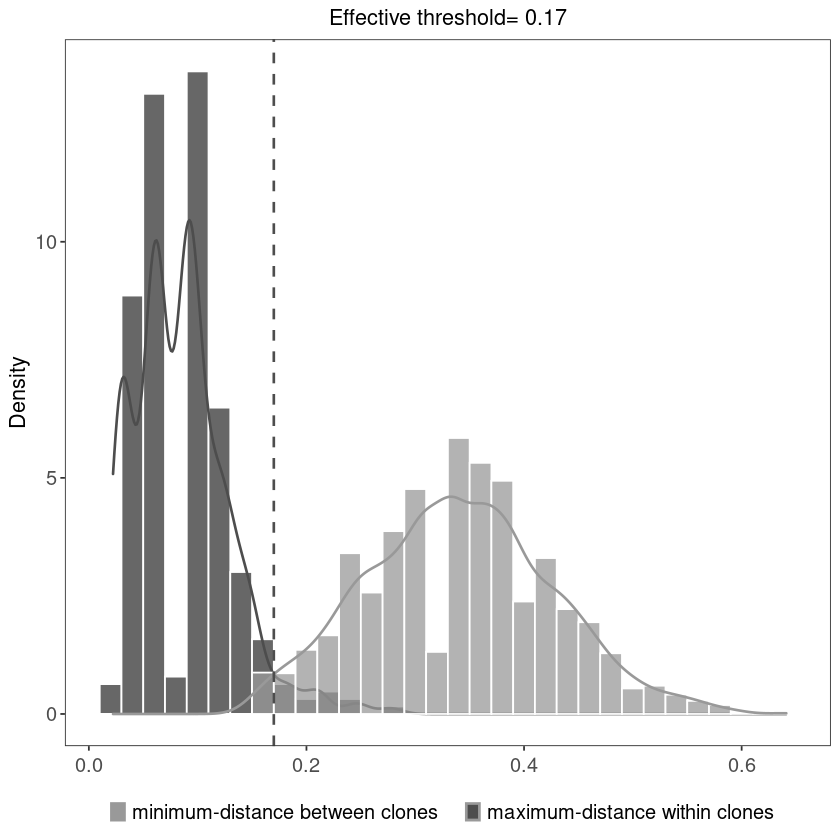

In [21]:
# Plot a histogram of inter and intra clonal distances

# It is always a bimodal
# Left node interprets as differences within the same clone (intra),
# Right node explains differences that is not in the same clone (inter).
# You want to find threshold between those distribution to assign sequences in clone
# without adding sequences between clones. 
plot(results, binwidth=0.02)

Running defineClonesScoper in bulk mode



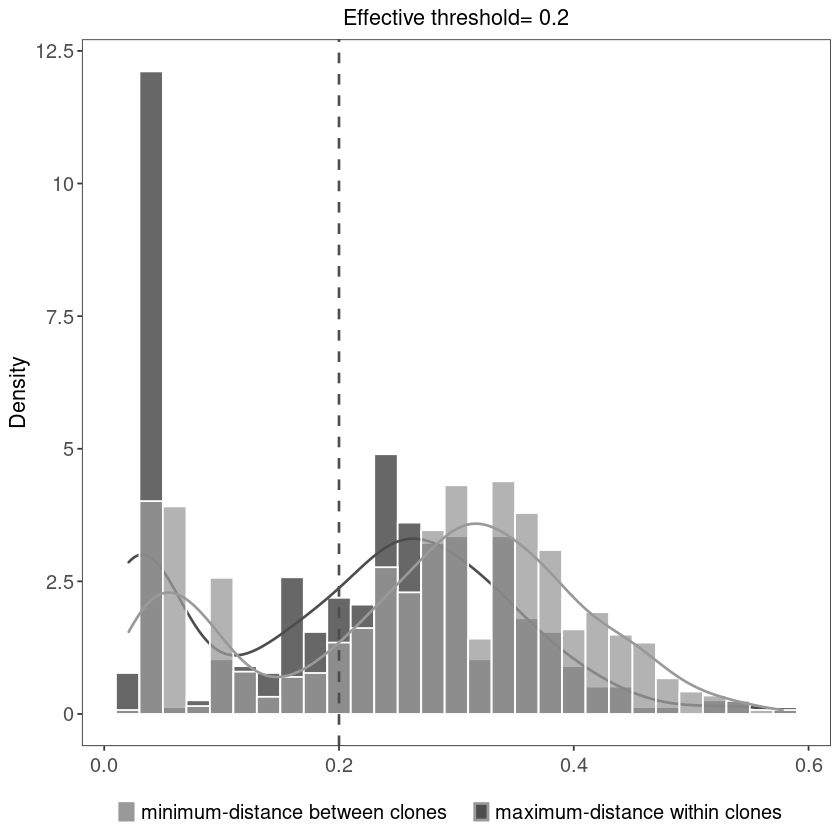

In [21]:
# Method 2. 
# Clonal assignment using the spectral clustering (adaptive, unsupervised) method novj
# This function concludes the clonal relationships using an adaptive unsupervised threshold
# to indicate the similarity levels within junction sequences in a local neighbor
# without threshold
results <- spectralClones(vac_data, method="novj")
# Plot a histogram of inter and intra clonal distances
plot(results, binwidth=0.02)

Running defineClonesScoper in bulk mode



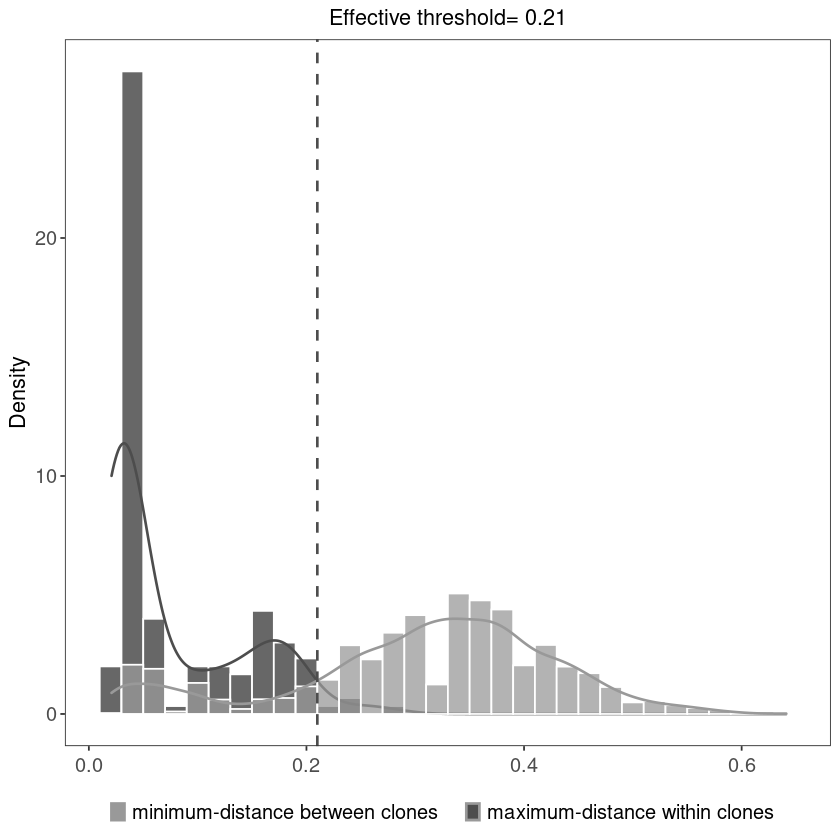

In [22]:
# Clonal assignment using the spectral clustering method novj with threshold
results <- spectralClones(vac_data, method="novj",
                          threshold=0.2)
# Plot a histogram of inter and intra clonal distances
plot(results, binwidth=0.02)

In [23]:
# Clonal assignment using the spectral clustering method vj with threshold
results <- spectralClones(vac_data, method="vj",
                          threshold=0.21,
                          germline="germline_alignment")

Running defineClonesScoper in bulk mode



In [24]:
# Get results data.frame
results_db <- as.data.frame(results)
glimpse(results_db)

Rows: 7,138
Columns: 58
$ sequence_id        <chr> "GTCACGGCACACATGT-1_contig_1", "CTTAGGATCGAACGGA-1…
$ sequence           <chr> "GAGTATACAGAACTTCATTATGGGATGGAGCCAGATCACCCTCTTTCTG…
$ rev_comp           <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", …
$ productive         <chr> "T", "T", "T", "T", "T", "T", "T", "T", "T", "T", …
$ v_call             <chr> "IGHV1-11*01", "IGHV1-62-2*01,IGHV1-71*01", "IGHV1…
$ d_call             <chr> "IGHD1-3*01", "IGHD2-5*01,IGHD2-6*01", "IGHD2-4*01…
$ j_call             <chr> "IGHJ4*01", "IGHJ4*01", "IGHJ3*01", "IGHJ3*01", "I…
$ sequence_alignment <chr> "CAGATCCAGCTGCAACAGTCAGGAGCT...GAGCTGGCGAGTCCTGGGG…
$ germline_alignment <chr> "CAGATCCAGCTGCAACAGTCAGGAGCT...GAGCTGGCGAGTCCTGGGG…
$ junction           <chr> "TGTGGAAGGAATAACCTCTATGCTATGGACTACTGG", "TGTGCAAGA…
$ junction_aa        <chr> "CGRNNLYAMDYW", "CARHEGSNLNFYAMDYW", "CARFPNDYDMAW…
$ v_cigar            <chr> "76S294=", "113S299=", "89S201=1X91=", "77S201=1X9…
$ d_cigar            <chr> "

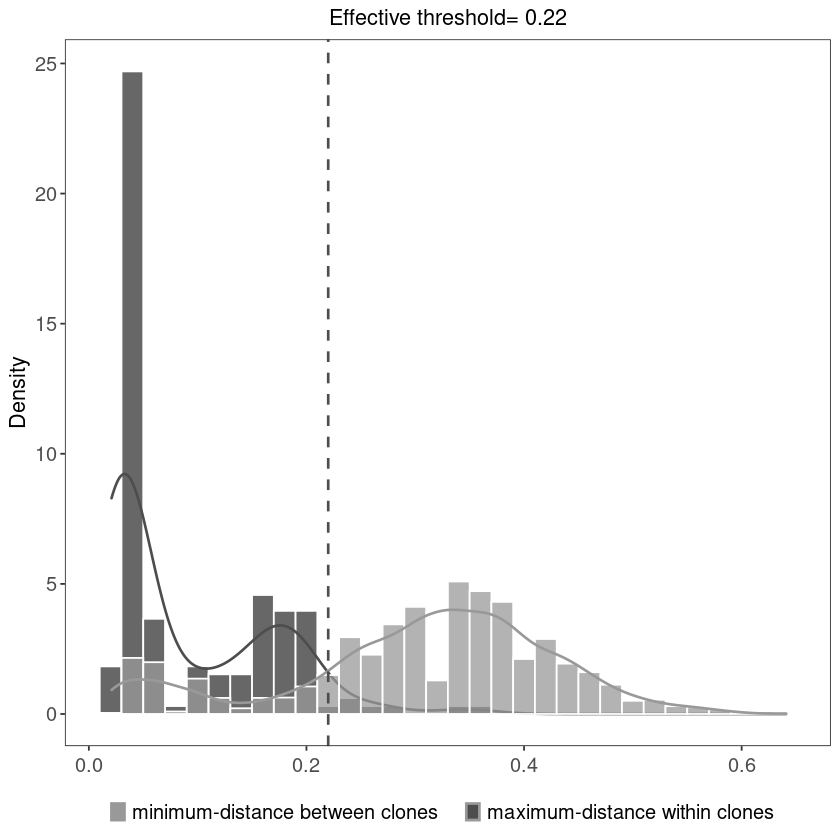

In [25]:
# Plot a histogram of inter and intra clonal distances
# based on method vj with threshold
plot(results, binwidth=0.02)

Warning message:
“Removed 20 rows containing non-finite values (stat_count).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”


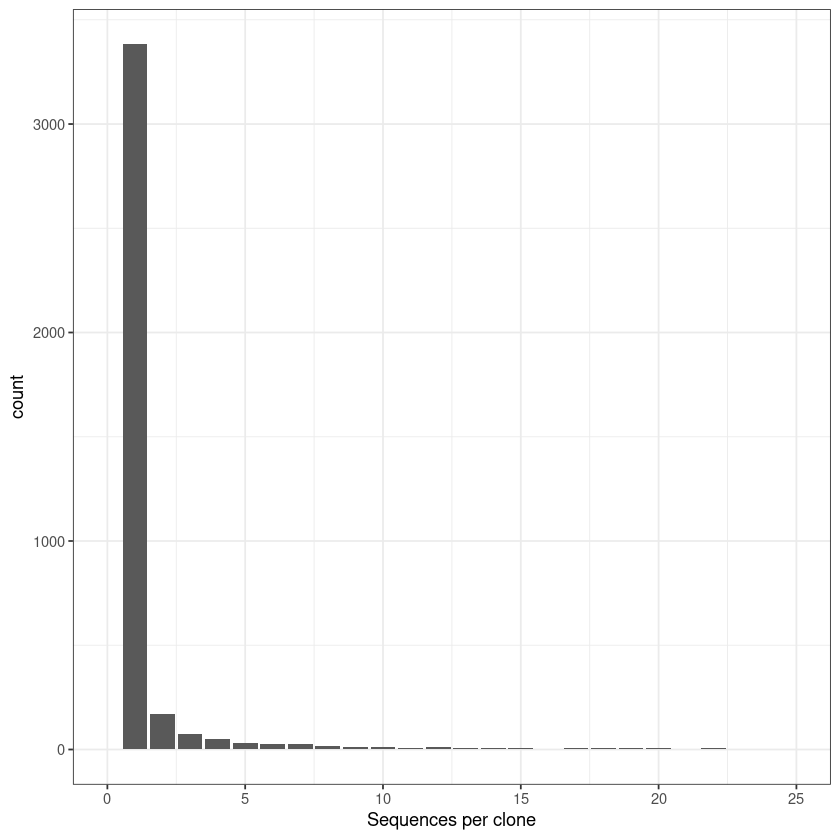

In [27]:
clone_sizes <- countClones(results_db)

# Plot cells per clone
ggplot(clone_sizes, aes(x=seq_count)) + geom_bar() + theme_bw() + xlab("Sequences per clone") + xlim(0, 25)